In [12]:
import pandas as pd

# Define the folder path and file names
folder_name = "results"
date = "2025-06-05_16-35"  # Replace with the exact date if needed

# Load the experiments DataFrame
experiments = pd.read_csv(f"{folder_name}/scenario_exploration_experiments_{date}.csv")

# Load the outcomes DataFrame
outcomes = pd.read_csv(f"{folder_name}/scenario_exploration_outcomes_{date}.csv")

print("DataFrames recreated from stored CSV files.")

DataFrames recreated from stored CSV files.


In [13]:
outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,5.767770e+08,0,0.0,0.0,1.007189
1,9.659008e+08,0,0.0,0.0,0.730446
2,2.299171e+09,0,0.0,0.0,1.327463
3,1.280612e+09,0,0.0,0.0,0.972326
4,9.144279e+08,0,0.0,0.0,1.037154
...,...,...,...,...,...
9995,3.107938e+09,0,0.0,0.0,1.965330
9996,7.206839e+08,0,0.0,0.0,1.169453
9997,1.869231e+09,0,0.0,0.0,2.504472
9998,5.322598e+08,0,0.0,0.0,0.780084


In [14]:
df=pd.DataFrame(outcomes)

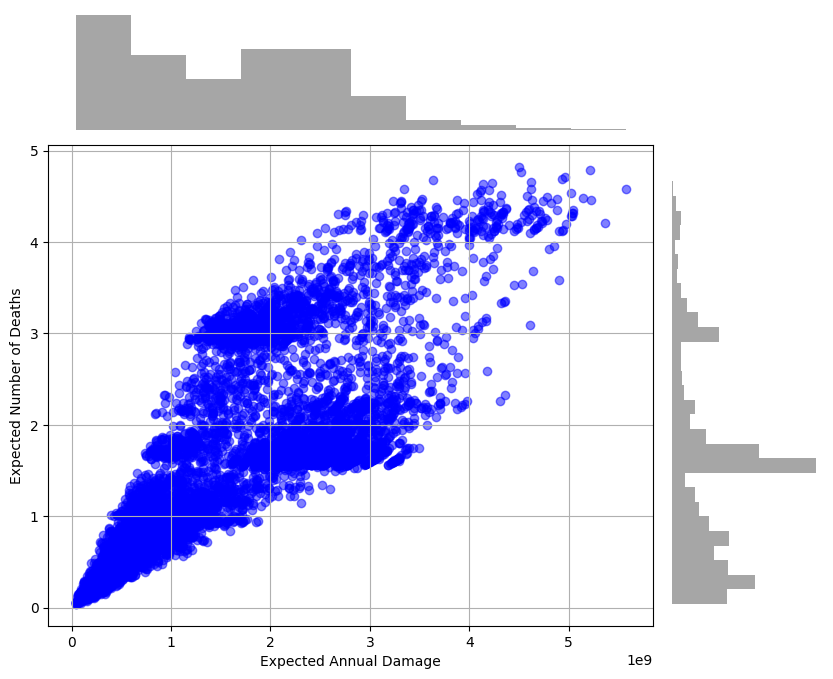

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure with a custom layout
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.05, wspace=0.05)

# Scatter plot
ax_scatter = fig.add_subplot(gs[1, 0])
ax_scatter.scatter(df['Expected Annual Damage'], df['Expected Number of Deaths'], c='blue', alpha=0.5)
ax_scatter.set_xlabel('Expected Annual Damage')
ax_scatter.set_ylabel('Expected Number of Deaths')
ax_scatter.grid(True)

# Histogram for RfR Total Costs
ax_hist_x = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_hist_x.hist(df['Expected Annual Damage'], bins=10, color='gray', alpha=0.7)
ax_hist_x.axis('off')  # Hide axis labels for better aesthetics

# Histogram for Total Deaths
ax_hist_y = fig.add_subplot(gs[1, 1], sharey=ax_scatter)
ax_hist_y.hist(df['Expected Number of Deaths'], bins=30, orientation='horizontal', color='gray', alpha=0.7)
ax_hist_y.axis('off')  # Hide axis labels for better aesthetics

plt.show()

In [ ]:
# [0,1] [0,1] Favourable scenario (damage, deaths)

# [5,] [4,] Very unfavourable scenario (damage, deaths)

# [2,3] [1,2] Medium favourable scenario (damage, deaths)

# [1.2, 2.2] [2.5, 3.5] Medium favourable scenario (damage, deaths)

# [4,5] [4,] Very unfavourable (damage, deaths)

In [ ]:
import numpy as np
# define the seed for reproducibility
np.random.seed(42)
# Create the bounds for which to include
bounds = [[[0,1],[0,1]],
            [[5,10], [4,10]],
            [[2,3], [1,2]],
            [[1.2, 2.2], [2.5, 3.5]],
            [[4,5], [4,10]]]
list_of_scenarios = pd.DataFrame()
for bound in bounds:
    # Filter the DataFrame based on the bounds
    indices = (df['Expected Annual Damage'] >= bound[0][0]*1000000000) & (df['Expected Annual Damage'] <= bound[0][1]*1000000000) & (df['Expected Number of Deaths'] >= bound[1][0]) & (df['Expected Number of Deaths'] <= bound[1][1])
    
    filtered_outcomes = df[indices].copy()
    filtered_experiments = experiments[indices].copy()
    #print(indices)
    # randomly select 2 scnearios from the filtered outcomes
    
    if not indices.empty:
        indices = indices.sample(n=2, random_state=42)
    else:
        print(f"No outcomes found for bounds {bound}.")
        continue
    # Append the filtered outcomes to the list
    list_of_scenarios = pd.concat([list_of_scenarios, indices], ignore_index=True)
list_of_scenarios

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,True
8,False
9,False
